In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/serge/para/1_projects/course_385/24s/github/week-12':
  os.chdir(r'/Users/serge/para/1_projects/course_385/24s/github/week-12')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/r_/wrvvnby97qz9_wm2pzw40qhh0000gn/T/ipykernel_9569/3314723156.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/importlib/_bootstrap.py": 1708117302.8894389, "/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/importlib/_bootstrap_external.py": 1708117302.895673, "/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/zipimport.py": 1708117300.842618, "/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/codecs.py": 1708117300.2231953, "/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/encodings/aliases.py": 1708117301.4904184, "/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/encodings/__init__.py": 1708117301.4862745, "/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/encodings/utf_8.py": 1708117302.0979323, "/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/abc.py": 1708117300.1248448, "/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/io.py": 1708117300.4300423, "/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/stat.py": 17081173

In [2]:
#| warning: false
import numpy as np
from pointpats import PointPattern
%matplotlib inline
import matplotlib.pyplot as plt
points = [[66.22, 32.54], [22.52, 22.39], [31.01, 81.21],
          [9.47, 31.02],  [30.78, 60.10], [75.21, 58.93],
          [79.26,  7.68], [8.23, 39.93],  [98.73, 77.17],
          [89.78, 42.53], [65.19, 92.08], [54.46, 8.48]]
pp = PointPattern(points) #create a point pattern "pp" from list
pp.points 

,x,y
0,66.22,32.54
1,22.52,22.39
2,31.01,81.21
3,9.47,31.02
4,30.78,60.10
5,75.21,58.93
6,79.26,7.68
7,8.23,39.93
8,98.73,77.17
9,89.78,42.53


In [3]:
#| warning: false
type(pp.points)

pandas.core.frame.DataFrame

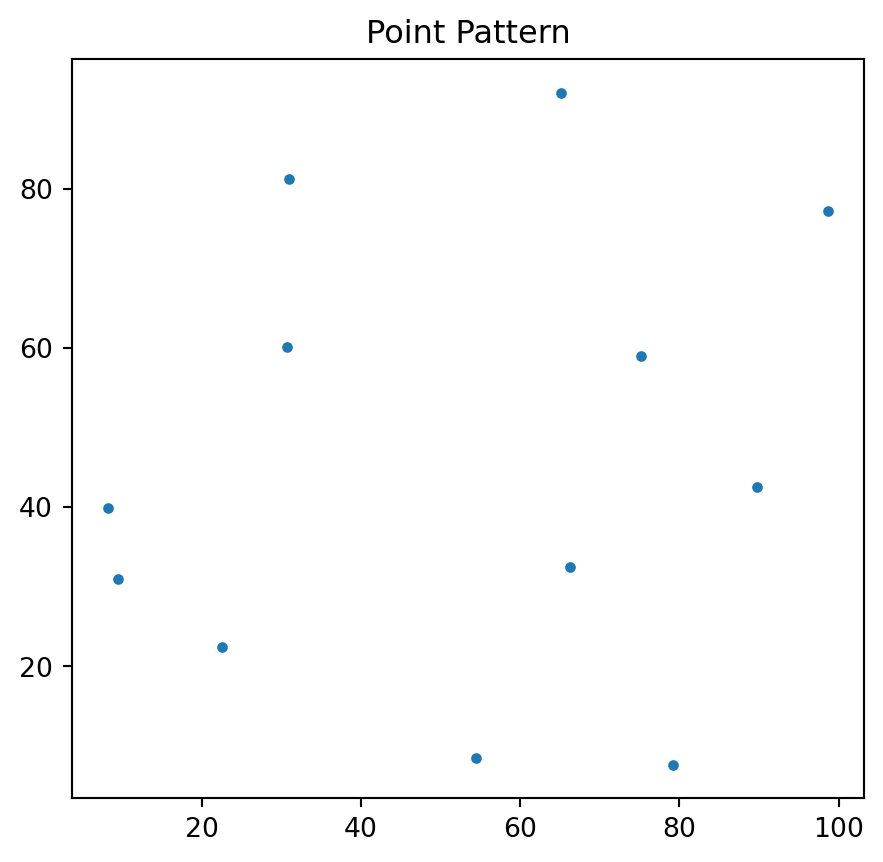

In [4]:
pp.plot()

In [5]:
from pointpats.centrography import (hull, mbr, mean_center,
                                    weighted_mean_center, manhattan_median,
                                    std_distance,euclidean_median,ellipse)

In [6]:
mc = mean_center(pp.points)
mc

array([52.57166667, 46.17166667])

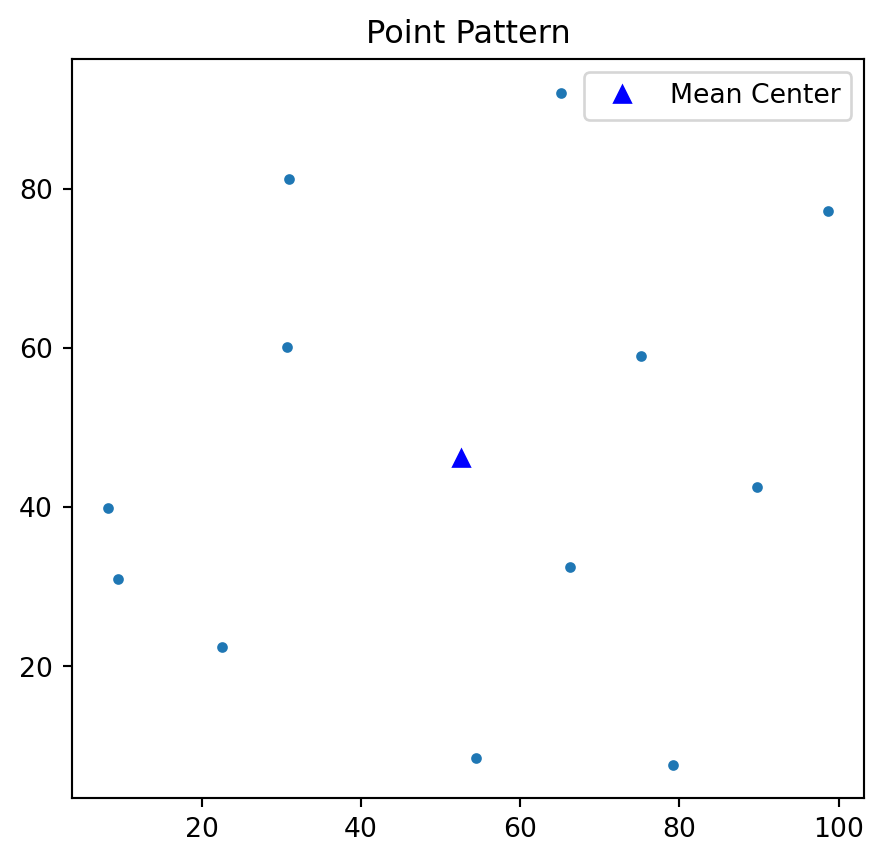

In [7]:
pp.plot()
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.legend(numpoints=1)

In [8]:
weights = np.arange(12)
weights

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [9]:
wmc = weighted_mean_center(pp.points, weights)
wmc

array([60.51681818, 47.76848485])

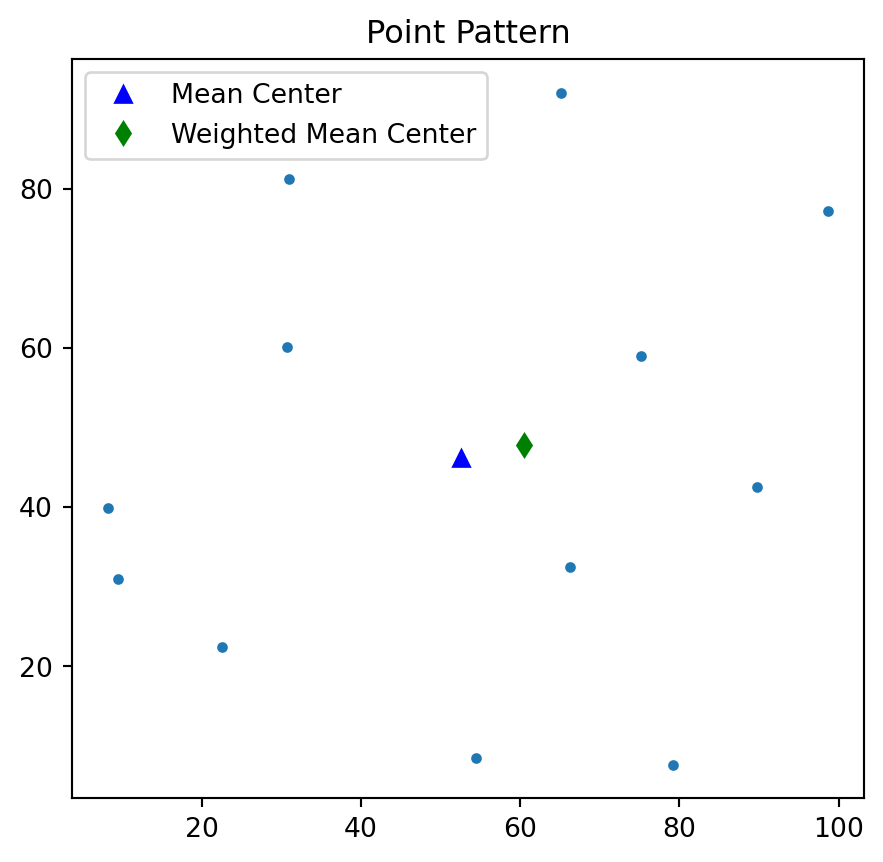

In [10]:
pp.plot() #use class method "plot" to visualize point pattern
plt.plot(mc[0], mc[1], 'b^', label='Mean Center') 
plt.plot(wmc[0], wmc[1], 'gd', label='Weighted Mean Center')
plt.legend(numpoints=1)

In [11]:
#get the number of points in point pattern "pp"
pp.n

12

In [12]:
#Manhattan Median is not unique for "pp"
mm = manhattan_median(pp.points)
mm

/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/site-packages/pointpats/centrography.py:208: UserWarning: Manhattan Median is not unique for even point patterns.
  warnings.warn(s)


array([59.825, 41.23 ])

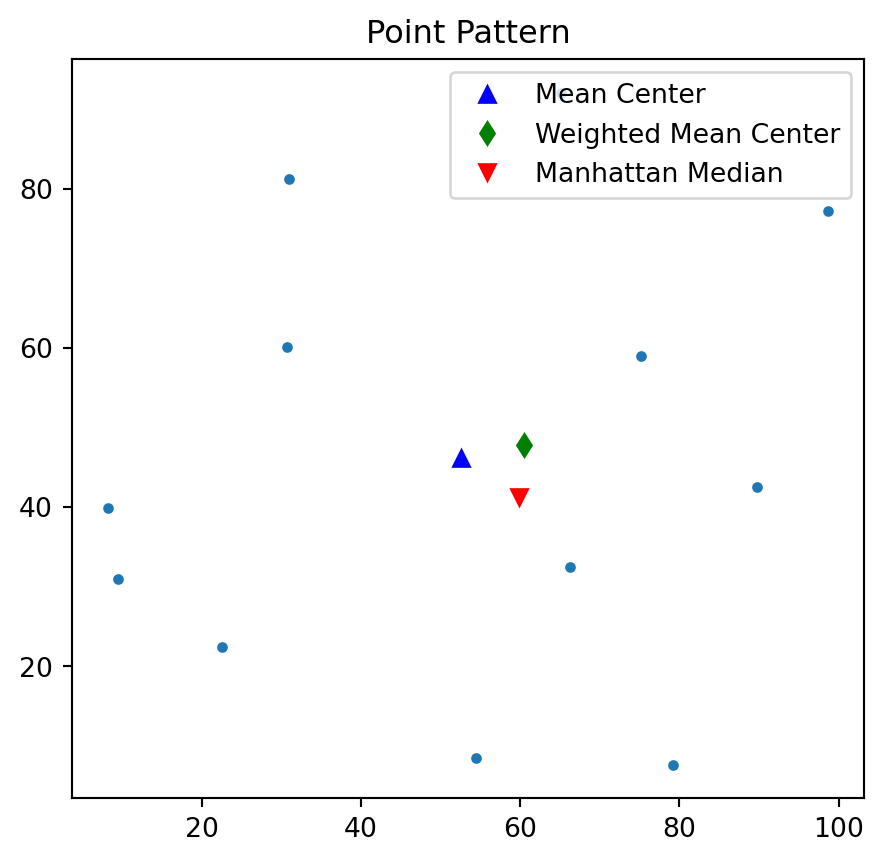

In [13]:
pp.plot()
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.plot(wmc[0], wmc[1], 'gd', label='Weighted Mean Center')
plt.plot(mm[0], mm[1], 'rv', label='Manhattan Median')
plt.legend(numpoints=1)

In [14]:
def median_center(points, crit=0.0001):
    points = np.asarray(points)
    x0, y0 = points.mean(axis=0)
    dx = np.inf
    dy = np.inf
    iteration = 0
    while np.abs(dx) > crit or np.abs(dy) > crit:
        xd = points[:, 0] - x0
        yd = points[:, 1] - y0
        d = np.sqrt(xd*xd + yd*yd)
        w = 1./d
        w = w / w.sum()
        x1 = w * points[:, 0]
        x1 = x1.sum()
        y1 = w * points[:, 1]
        y1 = y1.sum()
        dx = x1 - x0
        dy = y1 - y0
        iteration +=1 
        print(x0, x1, dx, dy, d.sum(), iteration)
        x0 = x1
        y0 = y1
               
    return x1, y1

In [15]:
median_center(pp.points, crit=.0001)

52.57166666666668 53.178128280602785 0.606461613936105 -0.9290354286335258 466.24479074356606 1
53.178128280602785 53.56643624463614 0.388307964033352 -0.4199402653980684 465.9311160558993 2
53.56643624463614 53.80720376806838 0.24076752343224683 -0.1974862190386233 465.84555867343346 3
53.80720376806838 53.95348076207835 0.1462769940099662 -0.09642613786996179 465.8197750145871 4
53.95348076207835 54.04117257066307 0.08769180858472225 -0.04872250646902643 465.8115372002813 5
54.04117257066307 54.09327726928146 0.05210469861838618 -0.025370793047137852 465.80882301324334 6
54.09327726928146 54.12405125525861 0.030773985977148755 -0.013552246205456697 465.8079149010591 7
54.12405125525861 54.14215248769505 0.018101232436443127 -0.00739190209046825 465.8076087750224 8
54.14215248769505 54.15276956049696 0.010617072801906602 -0.0040992658298719675 465.8075052025632 9
54.15276956049696 54.15898467957115 0.0062151190741914775 -0.0023026998071102867 465.80747009858044 10
54.15898467957115 54

(54.167594287646125, 44.42430865883205)

In [16]:
em = euclidean_median(pp.points)
em

array([54.16773427, 44.42425854])

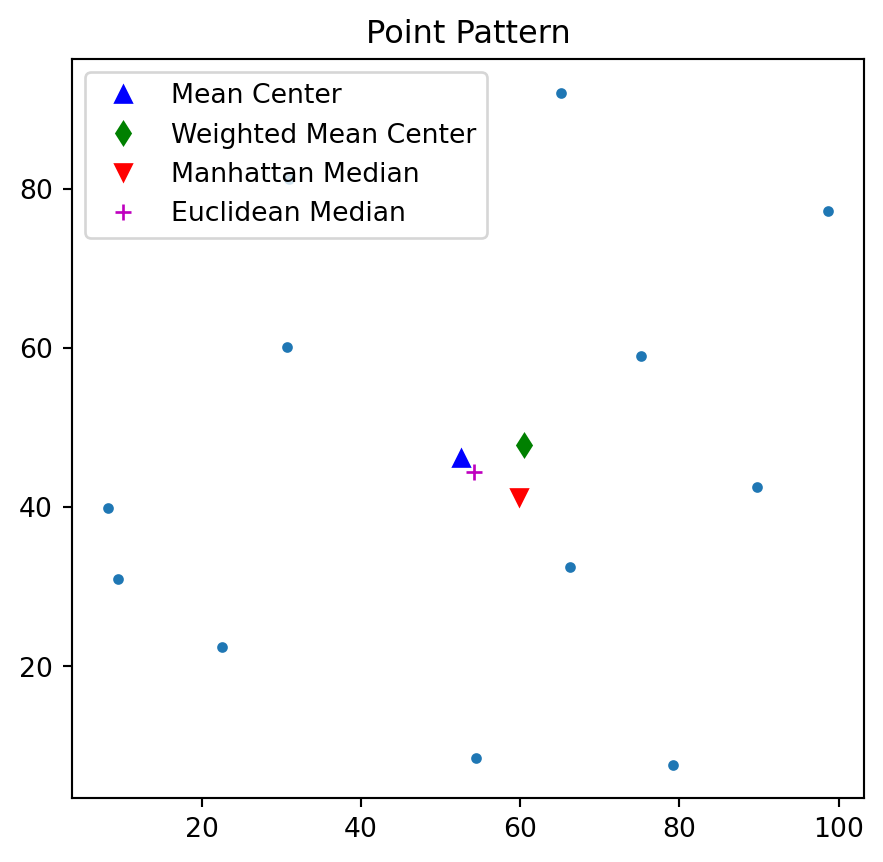

In [17]:
pp.plot()
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.plot(wmc[0], wmc[1], 'gd', label='Weighted Mean Center')
plt.plot(mm[0], mm[1], 'rv', label='Manhattan Median')
plt.plot(em[0], em[1], 'm+', label='Euclidean Median')
plt.legend(numpoints=1)

In [18]:
stdd = std_distance(pp.points)
stdd

40.14980648908671

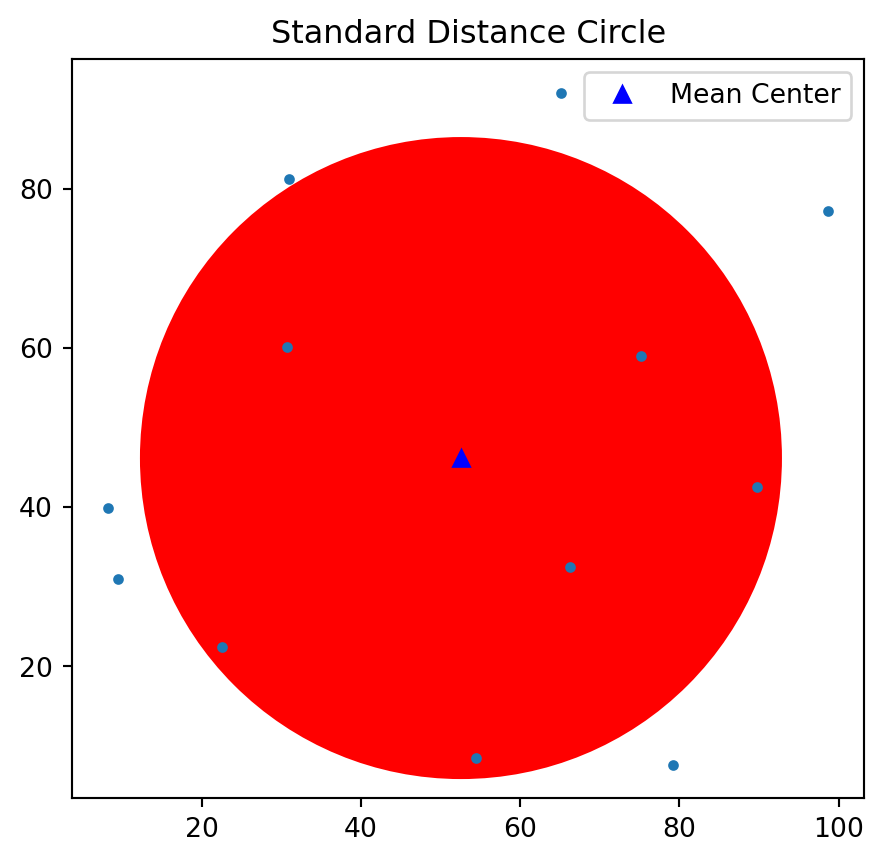

In [19]:
circle1=plt.Circle((mc[0], mc[1]),stdd,color='r')
ax = pp.plot(get_ax=True, title='Standard Distance Circle')
ax.add_artist(circle1)
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
ax.set_aspect('equal')
plt.legend(numpoints=1)

In [20]:
sx, sy, theta = ellipse(pp.points)
sx, sy, theta

(39.62386788646298, 42.753818949026815, 1.1039268428650906)

In [21]:
theta_degree = np.degrees(theta) #need degree of rotation to plot the ellipse
theta_degree

63.250348987371304

<Figure size 672x480 with 0 Axes>

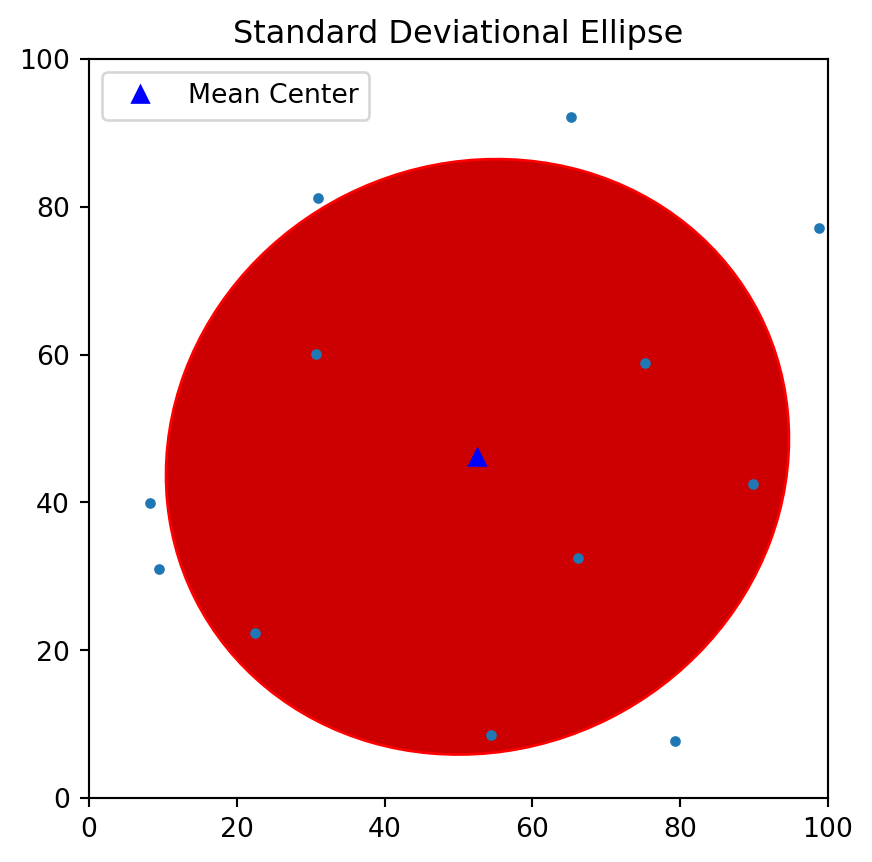

In [22]:
from matplotlib.patches import Ellipse
from pylab import figure, show,rand
fig = figure()
#ax = fig.add_subplot(111, aspect='equal')
e = Ellipse(xy=mean_center(pp.points), width=sx*2, height=sy*2, angle=-theta_degree) #angle is rotation in degrees (anti-clockwise)
ax = pp.plot(get_ax=True, title='Standard Deviational Ellipse')
ax.add_artist(e)
e.set_clip_box(ax.bbox)
e.set_facecolor([0.8,0,0])
e.set_edgecolor([1,0,0])
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_aspect('equal')
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.legend(numpoints=1)
show()

In [23]:
hull(pp.points)

array([[31.01, 81.21],
       [ 8.23, 39.93],
       [ 9.47, 31.02],
       [22.52, 22.39],
       [54.46,  8.48],
       [79.26,  7.68],
       [89.78, 42.53],
       [98.73, 77.17],
       [65.19, 92.08]])

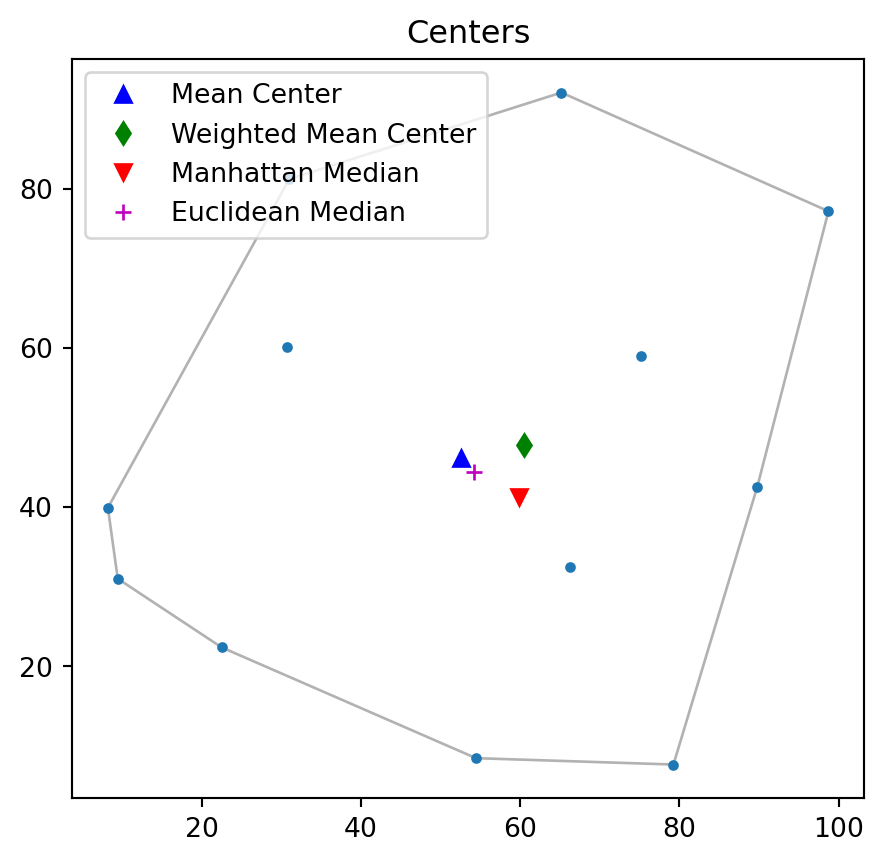

In [24]:
pp.plot(title='Centers', hull=True ) #plot point pattern "pp" as well as its convex hull
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.plot(wmc[0], wmc[1], 'gd', label='Weighted Mean Center')
plt.plot(mm[0], mm[1], 'rv', label='Manhattan Median')
plt.plot(em[0], em[1], 'm+', label='Euclidean Median')
plt.legend(numpoints=1)

In [25]:
mbr(pp.points)

/var/folders/r_/wrvvnby97qz9_wm2pzw40qhh0000gn/T/ipykernel_9569/2243439823.py:1: FutureWarning: This function will be deprecated in the next release of pointpats.
  mbr(pp.points)


(8.23, 7.68, 98.73, 92.08)

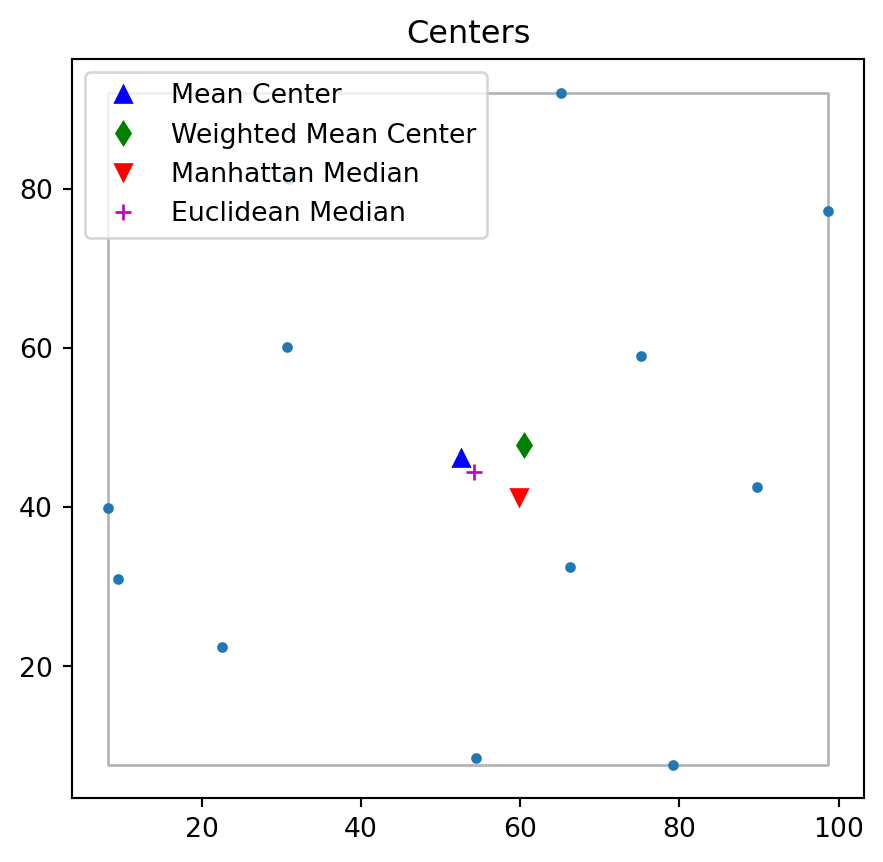

In [26]:
pp.plot(title='Centers', window=True ) #plot point pattern "pp" as well as its Minimum Bounding Rectangle
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.plot(wmc[0], wmc[1], 'gd', label='Weighted Mean Center')
plt.plot(mm[0], mm[1], 'rv', label='Manhattan Median')
plt.plot(em[0], em[1], 'm+', label='Euclidean Median')
plt.legend(numpoints=1)

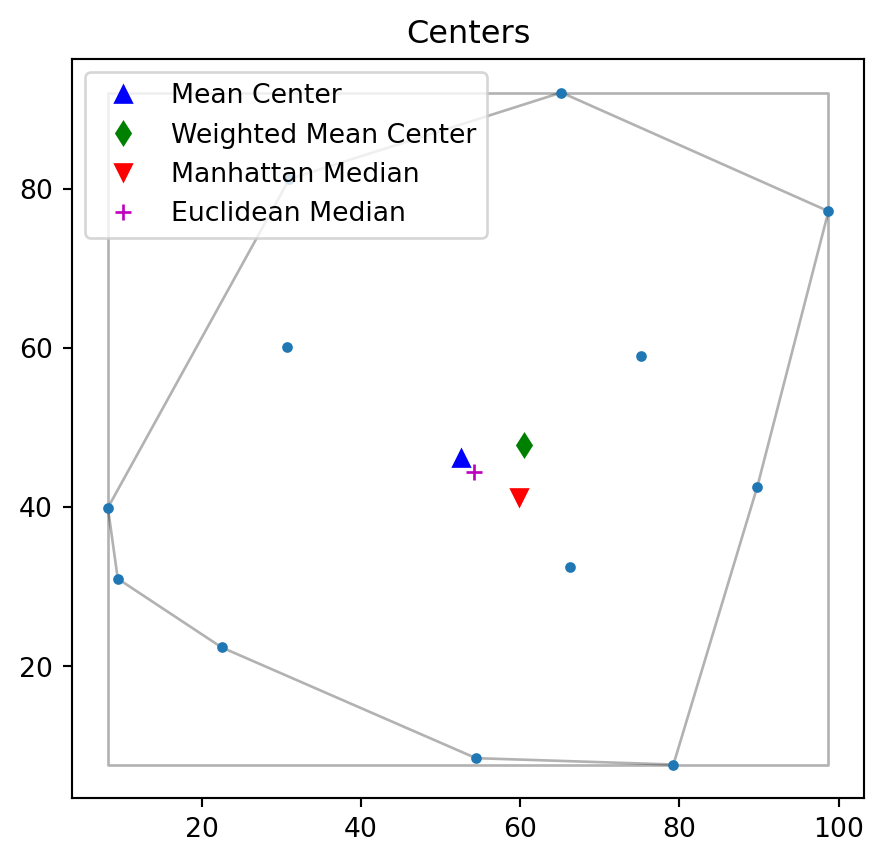

In [27]:
pp.plot(title='Centers',  hull=True , window=True )#plot point pattern "pp", convex hull, and Minimum Bounding Rectangle
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.plot(wmc[0], wmc[1], 'gd', label='Weighted Mean Center')
plt.plot(mm[0], mm[1], 'rv', label='Manhattan Median')
plt.plot(em[0], em[1], 'm+', label='Euclidean Median')
plt.legend(numpoints=1)

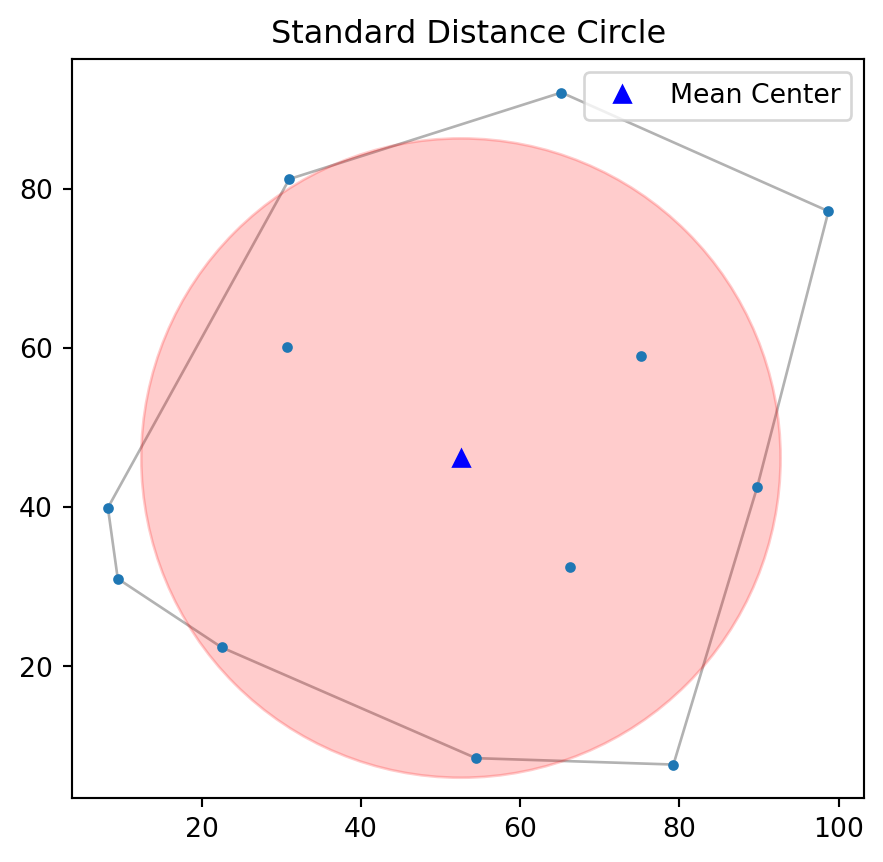

In [28]:
circle1=plt.Circle((mc[0], mc[1]),stdd,color='r',alpha=0.2)
ax = pp.plot(get_ax=True, title='Standard Distance Circle', hull=True)
ax.add_artist(circle1)
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
ax.set_aspect('equal')
plt.legend(numpoints=1)

In [29]:
#| warning: false
#from pysal.contrib import shapely_ext
from libpysal.cg import shapely_ext
from pointpats import PoissonPointProcess as csr
import libpysal as ps
from pointpats import as_window
#import pysal_examples

# open "vautm17n" polygon shapefile
va = ps.io.open(ps.examples.get_path("vautm17n.shp"))

# Create the exterior polygons for VA from the union of the county shapes
polys = [shp for shp in va]
state = shapely_ext.cascaded_union(polys)

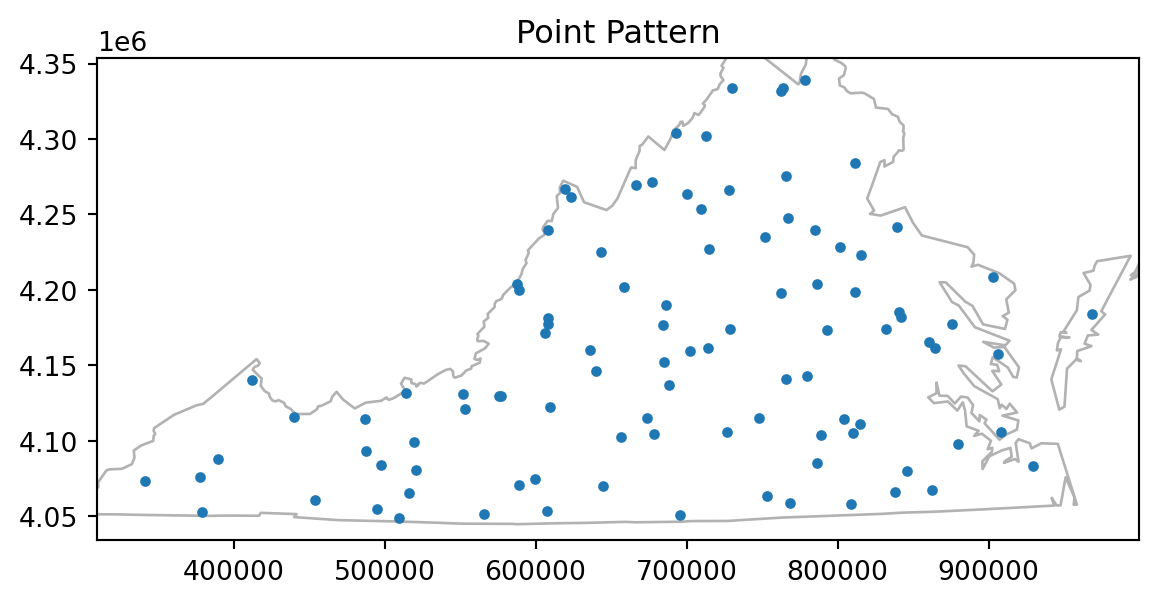

In [30]:
#| warning: false
pp = csr(as_window(state), 100, 1, asPP=True).realizations[0]
pp.plot(window=True)

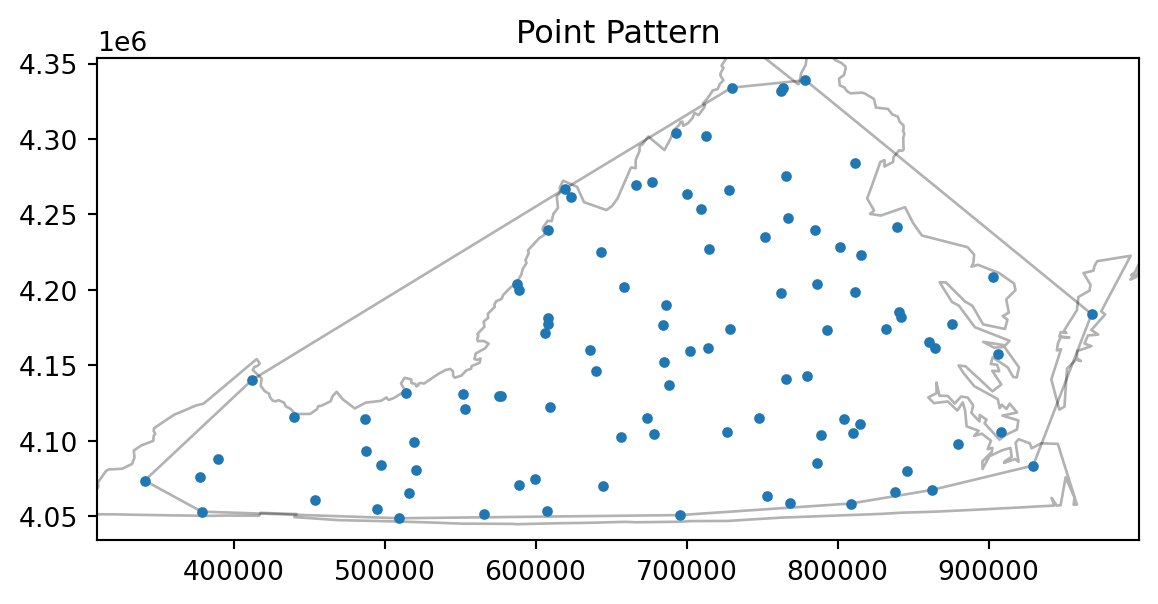

In [31]:
#| warning: false
pp.plot(window=True, hull=True)

/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/site-packages/pointpats/centrography.py:208: UserWarning: Manhattan Median is not unique for even point patterns.
  warnings.warn(s)


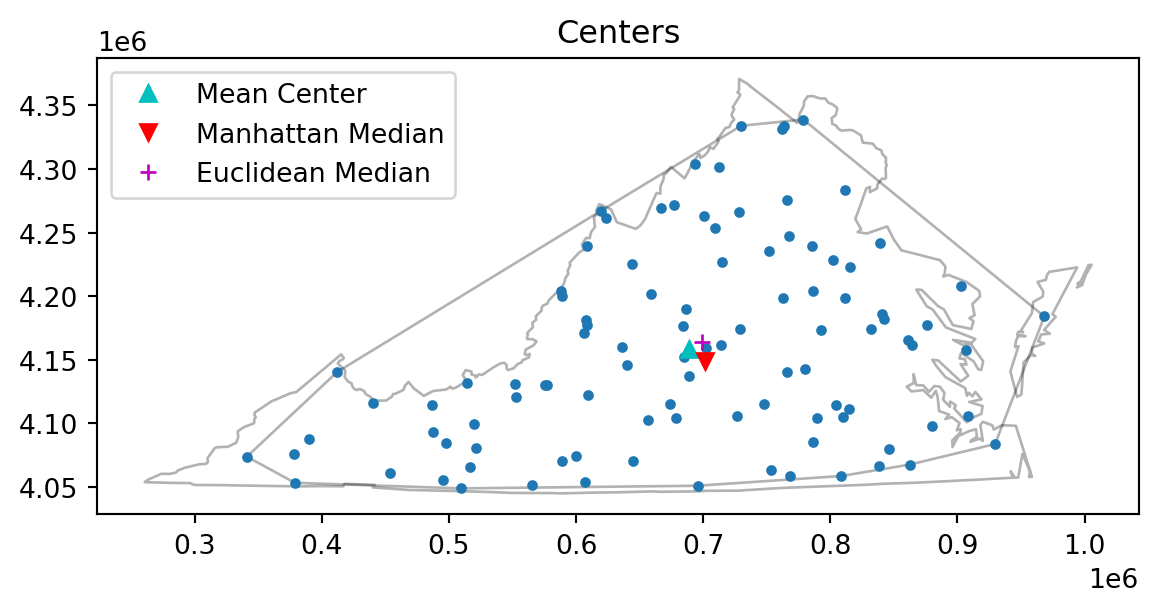

In [32]:
#| warning: false
mc = mean_center(pp.points)
mm = manhattan_median(pp.points)
em = euclidean_median(pp.points)
pp.plot(title='Centers',  hull=True , window=True )#plot point pattern "pp", convex hull, and Minimum Bounding Rectangle
plt.plot(mc[0], mc[1], 'c^', label='Mean Center')
plt.plot(mm[0], mm[1], 'rv', label='Manhattan Median')
plt.plot(em[0], em[1], 'm+', label='Euclidean Median')
plt.legend(numpoints=1)

<Figure size 672x480 with 0 Axes>

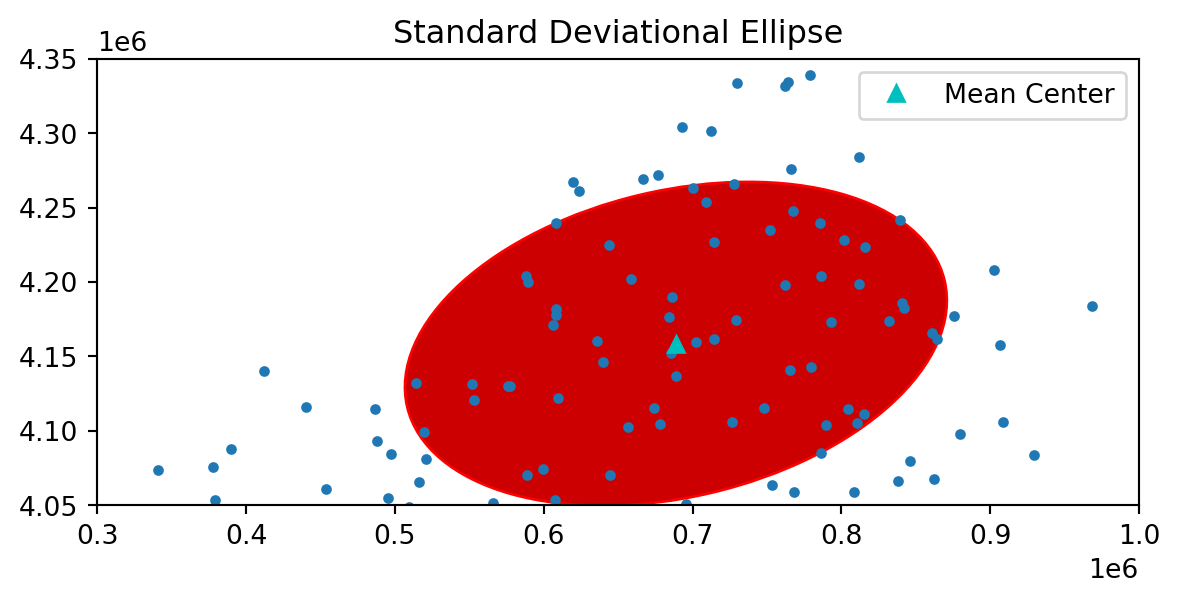

In [33]:
#| warning: false
sx, sy, theta = ellipse(pp.points)
sx, sy, theta
theta_degree = np.degrees(theta) #need degree of rotation to plot the ellipse
from matplotlib.patches import Ellipse
from pylab import figure, show,rand
fig = figure()
#ax = fig.add_subplot(111, aspect='equal')
e = Ellipse(xy=mean_center(pp.points), width=sx*2, height=sy*2, angle=-theta_degree)
ax = pp.plot(get_ax=True, title='Standard Deviational Ellipse')
ax.add_artist(e)
e.set_clip_box(ax.bbox)
e.set_facecolor([0.8,0,0])
e.set_edgecolor([1,0,0])
ax.set_xlim(300000,1000000)
ax.set_ylim(4050000,4350000)
#ax.set_aspect('equal')
plt.plot(mc[0], mc[1], 'c^', label='Mean Center')
plt.legend(numpoints=1)
show()

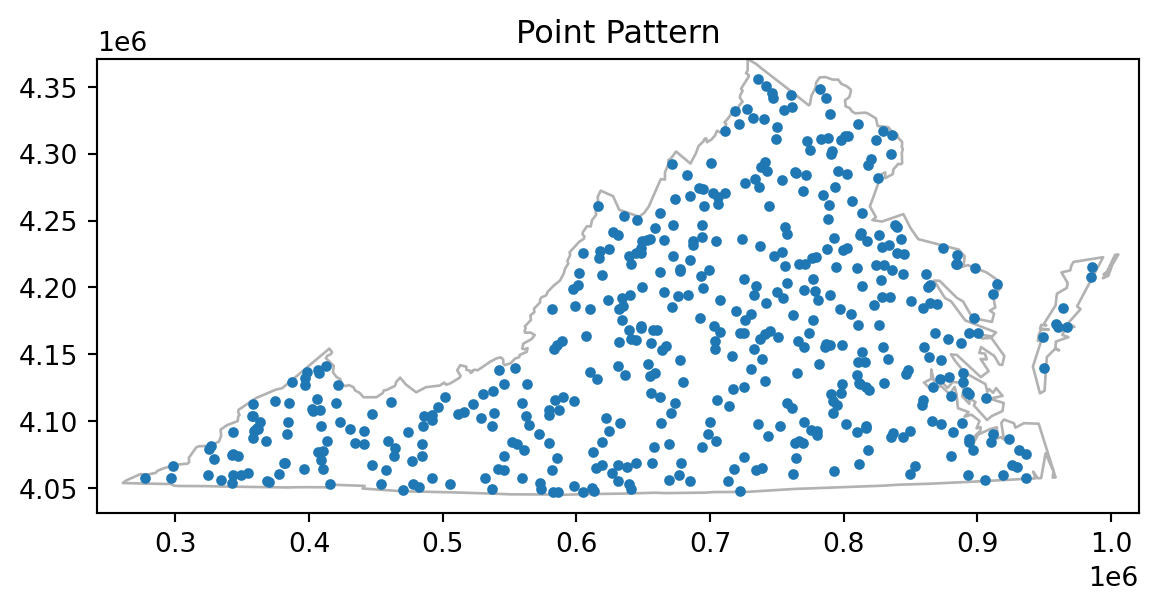

In [34]:
#| warning: false
pp = csr(as_window(state), 500, 1, asPP=True).realizations[0]
pp.plot(window=True)

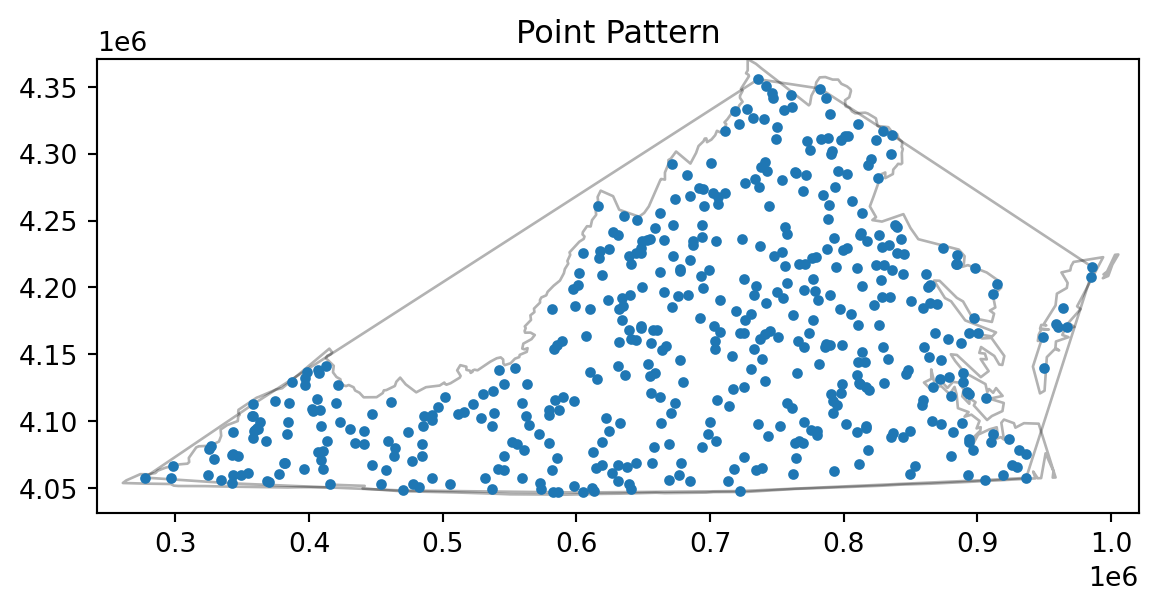

In [35]:
#| warning: false
pp.plot(window=True, hull=True)

/opt/homebrew/Caskroom/miniforge/base/envs/dev/lib/python3.12/site-packages/pointpats/centrography.py:208: UserWarning: Manhattan Median is not unique for even point patterns.
  warnings.warn(s)


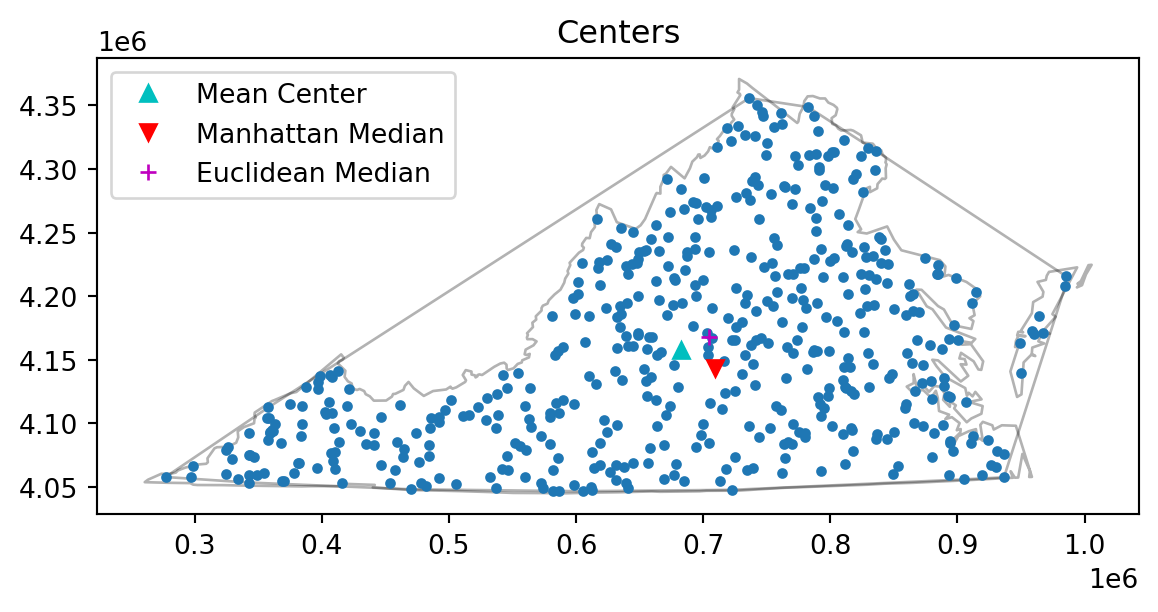

In [36]:
#| warning: false
mc = mean_center(pp.points)
mm = manhattan_median(pp.points)
em = euclidean_median(pp.points)
pp.plot(title='Centers',  hull=True , window=True )#plot point pattern "pp", convex hull, and Minimum Bounding Rectangle
plt.plot(mc[0], mc[1], 'c^', label='Mean Center')
plt.plot(mm[0], mm[1], 'rv', label='Manhattan Median')
plt.plot(em[0], em[1], 'm+', label='Euclidean Median')
plt.legend(numpoints=1)

<Figure size 672x480 with 0 Axes>

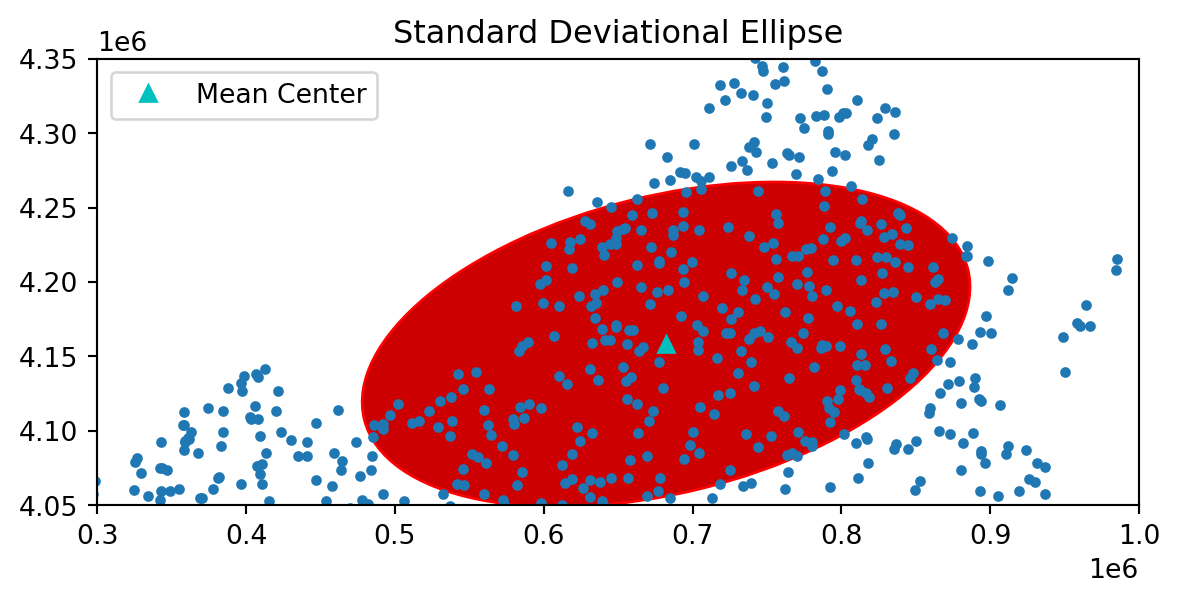

In [37]:
#| warning: false
sx, sy, theta = ellipse(pp.points)
sx, sy, theta
theta_degree = np.degrees(theta) #need degree of rotation to plot the ellipse
from matplotlib.patches import Ellipse
from pylab import figure, show,rand
fig = figure()
#ax = fig.add_subplot(111, aspect='equal')
e = Ellipse(xy=mean_center(pp.points), width=sx*2, height=sy*2, angle=-theta_degree)
ax = pp.plot(get_ax=True, title='Standard Deviational Ellipse')
ax.add_artist(e)
e.set_clip_box(ax.bbox)
e.set_facecolor([0.8,0,0])
e.set_edgecolor([1,0,0])
ax.set_xlim(300000,1000000)
ax.set_ylim(4050000,4350000)
#ax.set_aspect('equal')
plt.plot(mc[0], mc[1], 'c^', label='Mean Center')
plt.legend(numpoints=1)
show()

In [38]:
#| warning: false
from pointpats import dtot
print(dtot(mc, pp.points))
print(dtot(em, pp.points))
print(dtot(mc, pp.points) > dtot(em, pp.points))

78209525.00853494
77613185.08924484
True
